<a href="https://colab.research.google.com/github/rahiakela/edureka-deep-learning-with-tensorflow/blob/module-4-master-deep-networks/module_4_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Assignment: Deep dive into Neural Networks with Tensorflow

**Analyse the information given in the following ‘Wines’ dataset and classify the wine based on their place of origin.**

This data contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Data variables:
* Alcohol
* Malic acid
* Ash
* Alkalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

The dataset for the ‘Wines’ looks like this:

<img src='https://github.com/rahiakela/img-repo/blob/master/wine-dataset.png?raw=1' width='800'/>


Dataset download link:
https://www.edureka.co/medias/giu1bur0kw/download?media_file_id=254929809

## Task

1.   Create a model with minimum three hidden layers
2.   Compare the accuracy of the model with the previous model built in module 3



## Setup

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [5]:
# slice out featuers and labels from dataset
X = df[df.columns[1:13]]
y = df[df.columns[0]]
print(X.shape, y.shape)

(178, 12) (178,)


In [6]:
# normize the feature column
def feature_normalize(dataset):
  mu = np.mean(dataset,axis=0)
  sigma = np.std(dataset,axis=0)
  return (dataset - mu)/sigma
X = feature_normalize(X)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601


In [7]:
# do one-hot encoding for label
print(len(np.unique(y)))

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[:10])

3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [8]:
# Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, onehot_encoded, random_state=1)

# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(142, 12)
(142, 3)
(36, 12)
(36, 3)


In [14]:
# Define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 3

# Define the number of hidden layers and number of neurons for each layer
n_hidden_0 = 4
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_hat = tf.placeholder(tf.float32, [None, n_class])

n_dim 12


In [0]:
# Define the weights and the biases for each layer
weights = {
    'h0': tf.Variable(tf.truncated_normal([n_dim, n_hidden_0])),
    'h1': tf.Variable(tf.truncated_normal([n_hidden_0, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_3, n_class]))
}
biases = {
    'b0': tf.Variable(tf.truncated_normal([n_hidden_0])),
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

# Define the model
def create_model(x, weights, biases):

  # 0- Input layer with RELU activationed
  layer_0 = tf.nn.relu(tf.add(tf.matmul(x, weights['h0']), biases['b0']))

  # 1- Hidden layer with RELU activationed
  layer_1 = tf.nn.relu(tf.add(tf.matmul(layer_0, weights['h1']), biases['b1']))

  # 2- Hidden layer with RELU activationed
  layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))

  # 3- Hidden layer with softmax activationed
  layer_3 = tf.nn.softmax(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))

  # Output layer with linear activation
  output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

  return output_layer

  
# Initialize all the variables
init = tf.global_variables_initializer()

# create the model
y = create_model(x, weights, biases)

In [0]:
# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# create session
sess = tf.Session()
sess.run(init)

In [19]:
# Calculate the cost and the accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
  sess.run(training_step, feed_dict={x: train_x, y_hat: train_y})
  cost = sess.run(cost_function, feed_dict={x: train_x, y_hat: train_y})

  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_hat, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  pred_y = sess.run(y, feed_dict={x: test_x})
  mse = tf.reduce_mean(tf.square(pred_y - test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)

  accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_hat: train_y}))
  accuracy_history.append(accuracy)

  print(f'epoch: {str(epoch)} - cost: {str(cost)} - MSE: {str(mse_)} - Train Accuracy: {str(accuracy)}')

epoch: 0 - cost: -42.613537 - MSE: 13.683124104733857 - Train Accuracy: 0.26056337
epoch: 1 - cost: -143.69301 - MSE: 45.515401646798196 - Train Accuracy: 0.26056337
epoch: 2 - cost: -577.20844 - MSE: 178.9610891626658 - Train Accuracy: 0.26056337
epoch: 3 - cost: -2775.388 - MSE: 872.6638840699464 - Train Accuracy: 0.26056337
epoch: 4 - cost: -13647.438 - MSE: 4364.802849994914 - Train Accuracy: 0.26056337
epoch: 5 - cost: -66790.76 - MSE: 21618.02985176721 - Train Accuracy: 0.26056337
epoch: 6 - cost: -325836.16 - MSE: 106348.68976381265 - Train Accuracy: 0.26056337
epoch: 7 - cost: -1586051.5 - MSE: 520734.21163976775 - Train Accuracy: 0.26056337
epoch: 8 - cost: -7708120.5 - MSE: 2541415.480430316 - Train Accuracy: 0.26056337
epoch: 9 - cost: -37418532.0 - MSE: 12374437.178676872 - Train Accuracy: 0.26056337
epoch: 10 - cost: -181497070.0 - MSE: 60152478.83736488 - Train Accuracy: 0.26056337
epoch: 11 - cost: -879823940.0 - MSE: 292054183.5155289 - Train Accuracy: 0.26056337
epoch:

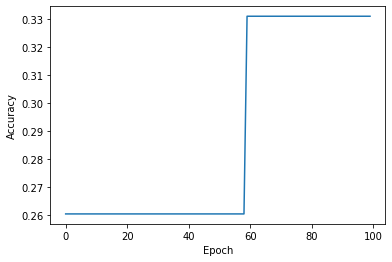

In [20]:
# Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [23]:
# final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_hat, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_hat: test_y})))

Test Accuracy:  0.33333334
